
# <center><font style="color:rgb(100,109,254)">Overlaying Logo With Removed Background</font></center>


###  <font style="color:rgb(134,19,348)">  Adding a Non Transparent Logo on Top of an Image</font>

See how to remove background of non-transparent images and overlay on another image

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'mask')

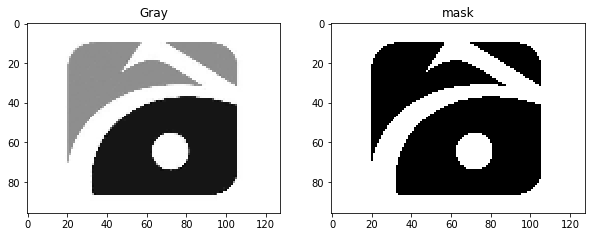

In [42]:
%matplotlib inline
imglogo=cv2.imread('media/M2/geo.jpg',1)
resized_logo = cv2.resize(imglogo, (0,0), fx=0.2, fy=0.2)

# Now we convert the image to greyscale for thresholding
img2gray = cv2.cvtColor(resized_logo,cv2.COLOR_BGR2GRAY)

# Threshold the Image to get the Required Mask
# The value 180 works for this particular logo,it may be different for other Images
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[10,10])
# If you're having less than 10 subplots you can skip the `,`
# 1 row,2 columns,index=1
plt.subplot(121) 
plt.imshow(img2gray,cmap='gray')
plt.title("Gray")

# 1 row,2 columns,index=2
plt.subplot(122);
plt.imshow(mask,cmap='gray')
plt.title("mask")

96
128
These shapes must be equal (96, 128, 3) (96, 128, 3)


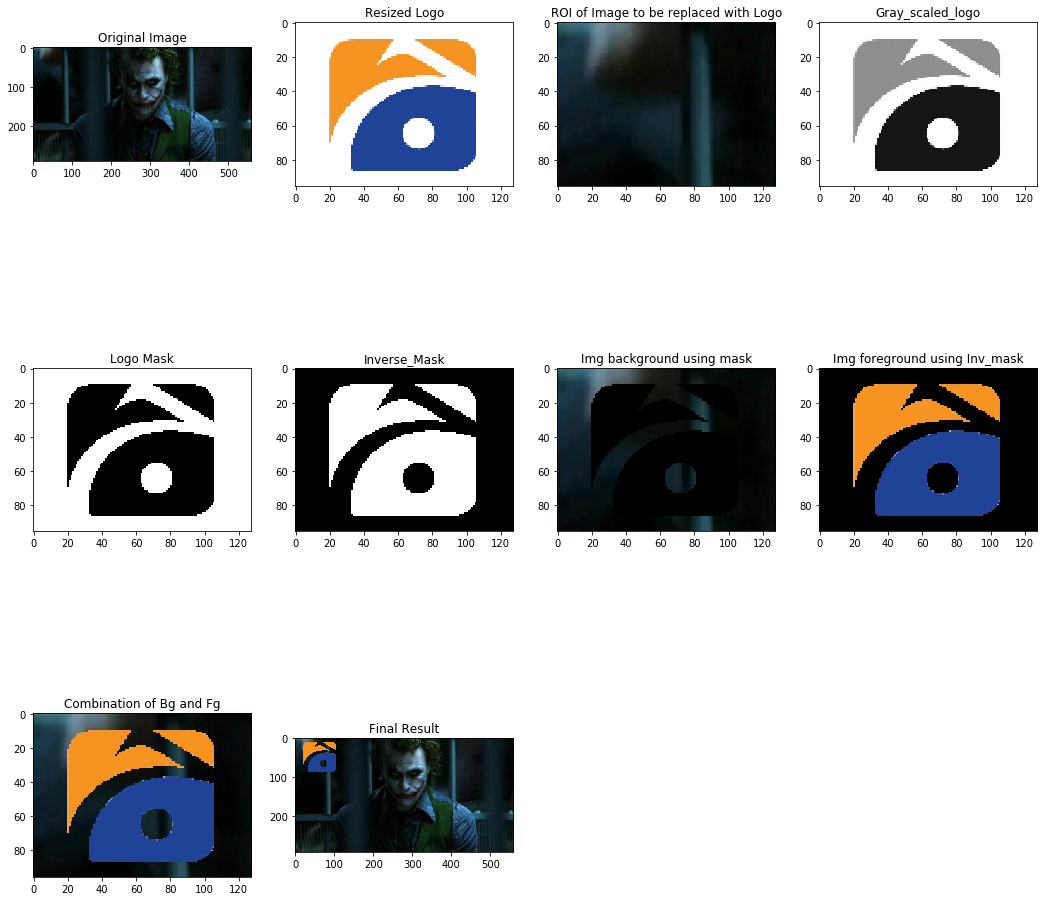

In [43]:
imglogo=cv2.imread('media/M2/geo.jpg',1)
img_main=cv2.imread('media/M2/joker1.png',1)
original = img_main.copy()

# Since the original logo was pretty big we will reduce the size
resized_logo = cv2.resize(imglogo, (0,0), fx=0.2, fy=0.2)
rows,cols,channels = resized_logo.shape
print(rows)
print(cols)
# Putting logo on top-left corner so I will grab the top right portion of main image accordingly
roi = img_main[0:rows, 0:cols]
theroi = roi.copy()

# Now we convert the image to greyscale for thresholding
img2gray = cv2.cvtColor(resized_logo,cv2.COLOR_BGR2GRAY)

# Threshold the Image to get the Required Mask
# The value 180 works for this particular logo,it may be different for other Images
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)

# Getting the Inverse Mask
mask_inv = cv2.bitwise_not(mask)

# Remember the shapes of roi and the resized_logo must match
print('These shapes must be equal', roi.shape,resized_logo.shape)

img_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image.
img_fg = cv2.bitwise_and(resized_logo,resized_logo,mask = mask_inv)

combined = cv2.add(img_bg,img_fg)
img_main[0:rows, 0:cols ] = combined

plt.figure(figsize=[18,18])
plt.subplot(341);plt.imshow(original[:,:,::-1]);plt.title("Original Image"); 
plt.subplot(342);plt.imshow(resized_logo[:,:,::-1]);plt.title("Resized Logo"); 
plt.subplot(343);plt.imshow(theroi[:,:,::-1]);plt.title("ROI of Image to be replaced with Logo");
plt.subplot(344);plt.imshow(img2gray,cmap='gray');plt.title("Gray_scaled_logo");
plt.subplot(345);plt.imshow(mask,cmap='gray');plt.title("Logo Mask");
plt.subplot(346);plt.imshow(mask_inv,cmap='gray');plt.title("Inverse_Mask");
plt.subplot(347);plt.imshow(img_bg[:,:,::-1]);plt.title("Img background using mask");
plt.subplot(348);plt.imshow(img_fg[:,:,::-1]);plt.title("Img foreground using Inv_mask");
plt.subplot(349);plt.imshow(combined[:,:,::-1]);plt.title("Combination of Bg and Fg");
plt.subplot(3,4,10);plt.imshow(img_main[:,:,::-1]);plt.title("Final Result");

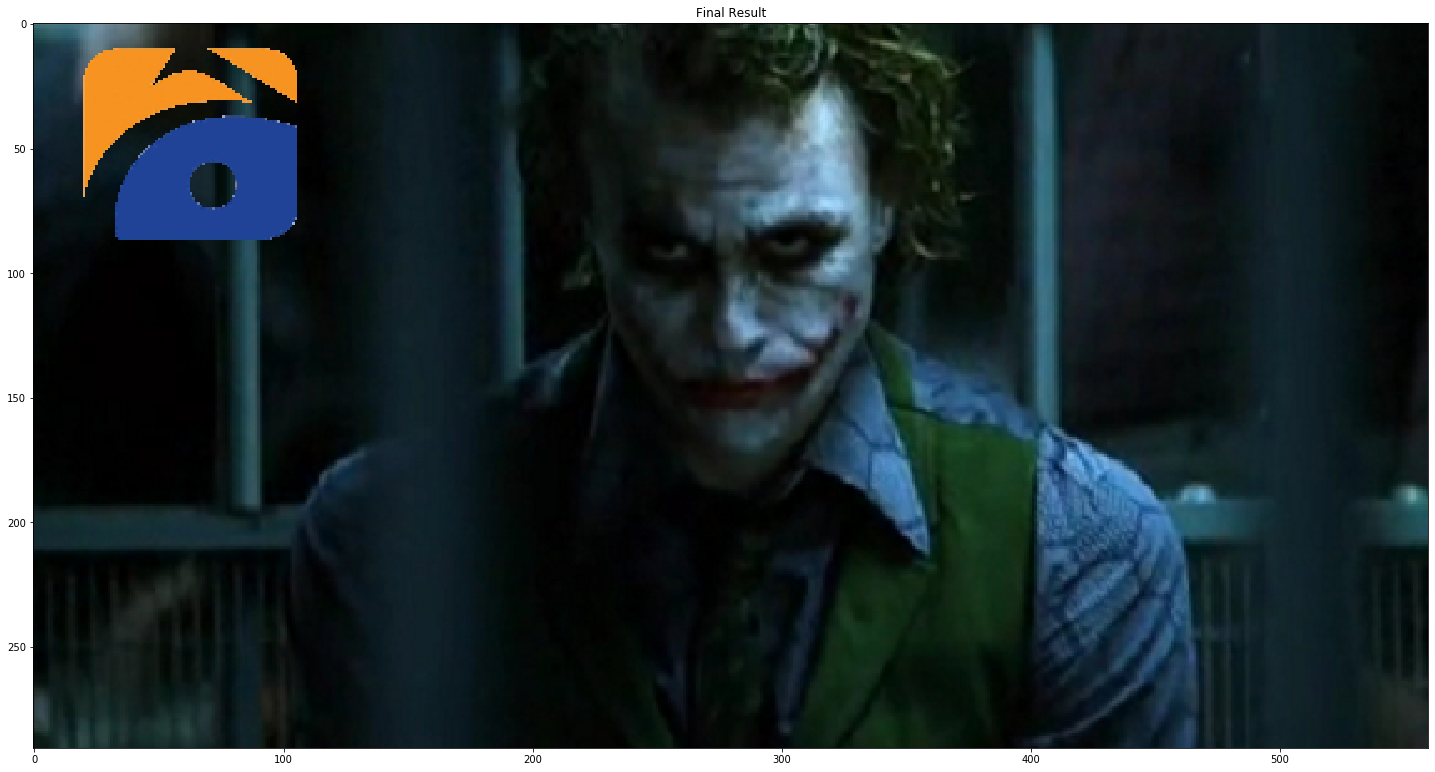

In [44]:
plt.figure(figsize=[25,25])
plt.imshow(img_main[:,:,::-1]);plt.title("Final Result");

###  <font style="color:rgb(134,19,348)">Adding a Transparent Logo on Top on an Image using the Apha Channel</font>

With Transparent images we already have a mask so no need for thresholding

These 2 shapes should be equal (81, 192, 4) (81, 192, 3)


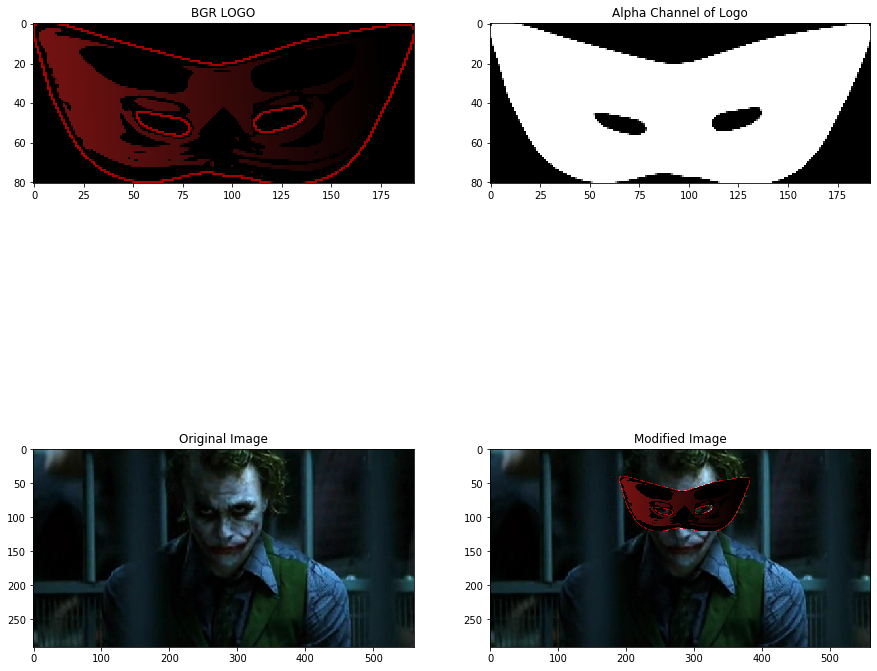

In [45]:
import cv2
img_logo=cv2.imread('media/M2/redmask.png',-1)
img_main=cv2.imread('media/M2/joker1.png',1)
original = img_main.copy()
resized_logo = cv2.resize(img_logo, (0,0), fx=0.2, fy=0.2)

rows,cols,channels = resized_logo.shape

constant = 40
constant2 = 190
roi = img_main[constant:rows+constant, constant2:cols+constant2]  

mask = resized_logo[:,:,-1]  # the 4th channel is the alpha channnel, its essentially a binary mask.
resized_logo_bgr = resized_logo[:,:,:3]  # removing the alpha mask to have a regular bgr image
print('These 2 shapes should be equal', resized_logo.shape,roi.shape)

mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv2.bitwise_and(resized_logo_bgr,resized_logo_bgr,mask = mask)

combined = cv2.add(img1_bg,resized_logo_bgr)
img_main[constant:rows+constant, constant2:cols+constant2]  = combined

plt.figure(figsize=[15,15])

plt.subplot(221);plt.imshow(resized_logo_bgr[:,:,::-1]);plt.title("BGR LOGO");
plt.subplot(222);plt.imshow(mask,cmap='gray');plt.title("Alpha Channel of Logo"); 
plt.subplot(223);plt.imshow(original[:,:,::-1]);plt.title("Original Image");
plt.subplot(224);plt.imshow(img_main[:,:,::-1]);plt.title("Modified Image");


###  <font style="color:rgb(34,169,134)">  Assignment: Add the provided annonymous mask in `M4` folder on joker's face instead of the eye mask we used </font>

Tip: Make sure shapes match , if they are not matching try to reduce the size

These 2 shapes should be equal (128, 99, 4) (128, 99, 3)


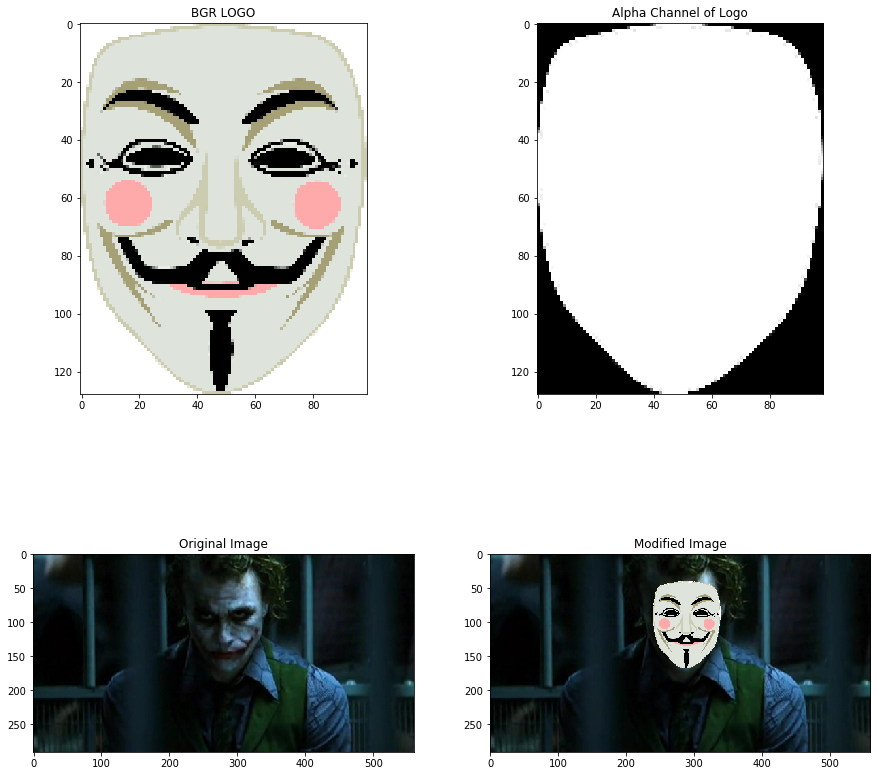

In [46]:
img_logo=cv2.imread('media/M2/anymask.png',-1)
img_main=cv2.imread('media/M2/joker1.png',1)
original = img_main.copy()
# ADD CODE WHERE MENTIONED

resized_logo =cv2.resize(img_logo, (0,0), fx=0.1, fy=0.1)                             ## ~1 line of code

rows,cols,channels = resized_logo.shape

constant = 40   ## ~1 line of code
constant2 =  240  ## ~1 line of code
roi = img_main[constant:rows+constant, constant2:cols+constant2]  

mask = resized_logo[:,:,-1]  # the 4th channel is the alpha channnel, its essentially a binary mask.
resized_logo_bgr = resized_logo[:,:,:3]  # removing the alpha mask to have a regular bgr image
print('These 2 shapes should be equal', resized_logo.shape,roi.shape)

mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv2.bitwise_and(resized_logo_bgr,resized_logo_bgr,mask = mask)

combined = cv2.add(img1_bg,img2_fg)
img_main[constant:rows+constant, constant2:cols+constant2]  = combined

plt.figure(figsize=[15,15])
plt.subplot(221);plt.imshow(resized_logo_bgr[:,:,::-1]);plt.title("BGR LOGO");
plt.subplot(222);plt.imshow(mask,cmap='gray');plt.title("Alpha Channel of Logo"); 
plt.subplot(223);plt.imshow(original[:,:,::-1]);plt.title("Original Image");
plt.subplot(224);plt.imshow(img_main[:,:,::-1]);plt.title("Modified Image");

###  <font style="color:rgb(134,129,134)">   Great job completing this , in the coming tutorials we are gonna automatically get the co-ordinates for the face via face detection and put a mask on the face </font>
